In [1]:
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
import libpysal
import numpy

import sys
sys.path.append("../")
from spopt import MaxPHeuristic as MaxP

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
pth = libpysal.examples.get_path('mexicojoin.shp')
mexico = gpd.read_file(pth)


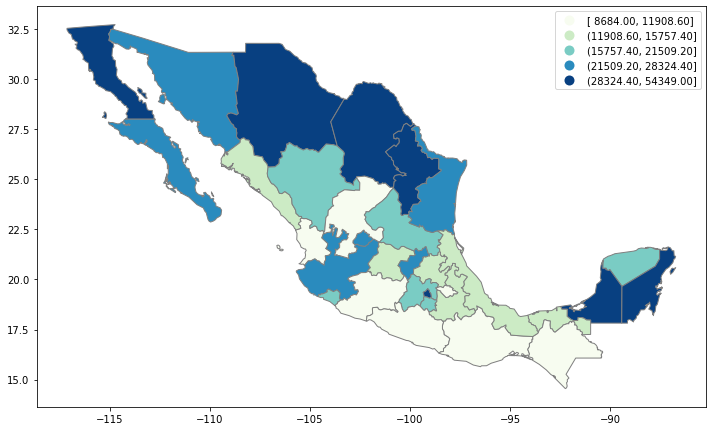

In [4]:
mexico.plot(column=f'PCGDP{2000}', scheme='Quantiles', cmap='GnBu', edgecolor='grey', legend=True)

In [5]:
attrs_name = [f'PCGDP{2000}']
w = libpysal.weights.Queen.from_dataframe(mexico)
threshold = 6
top_n = 2
mexico['count'] = 1
threshold_name = 'count'
model = MaxP(mexico, w, attrs_name, threshold_name, threshold, top_n)
model.solve()

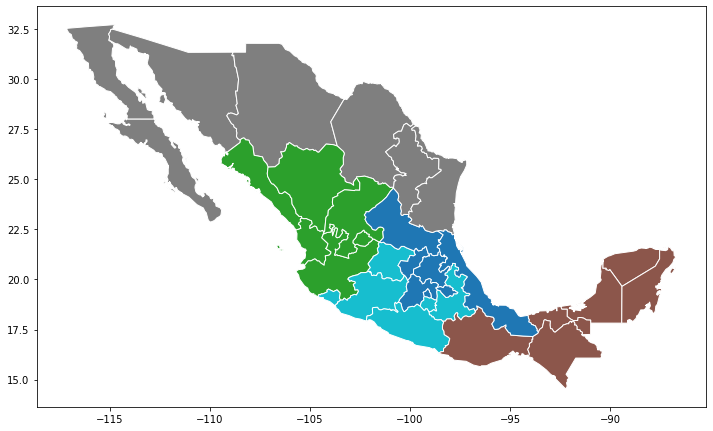

In [6]:
mexico['maxp_new'] = model.labels_
mexico.plot(column='maxp_new', categorical=True,  edgecolor='w')

In [10]:
from spopt.region.skater import Skater
from sklearn.metrics import pairwise as skm
import numpy as np
n_clusters = 5
floor = 5
trace = False
islands = "increase"
spanning_forest_kwds = dict(
    dissimilarity=skm.manhattan_distances, affinity=None, reduction=np.sum, center=np.mean
)
model = Skater(mexico, w, attrs_name, n_clusters, floor, trace, islands, spanning_forest_kwds)
model.solve()

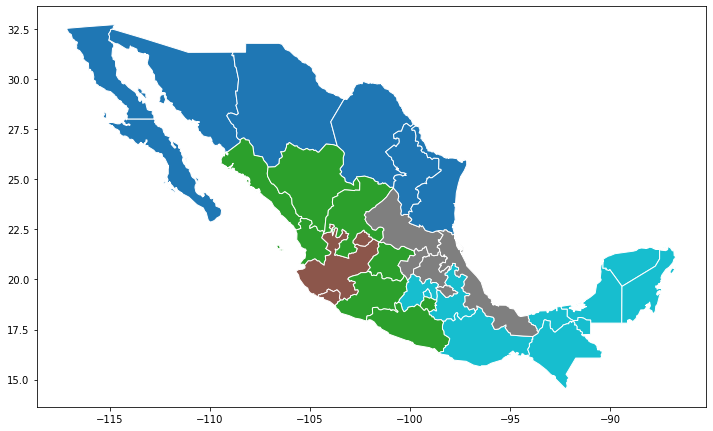

In [18]:
mexico['skater_new'] = model.labels_
mexico['number'] = 1
mexico.plot(column='skater_new', categorical=True, figsize=(12,8), edgecolor='w')

In [19]:
from spopt import AZP
model = AZP(mexico, w, attrs_name, n_clusters)
model.solve()

n_regions_per_comp {0: 5}
comp_label 0
n_regions_in_comp 5
Regions in comp: {0, 1, 2, 3, 4}


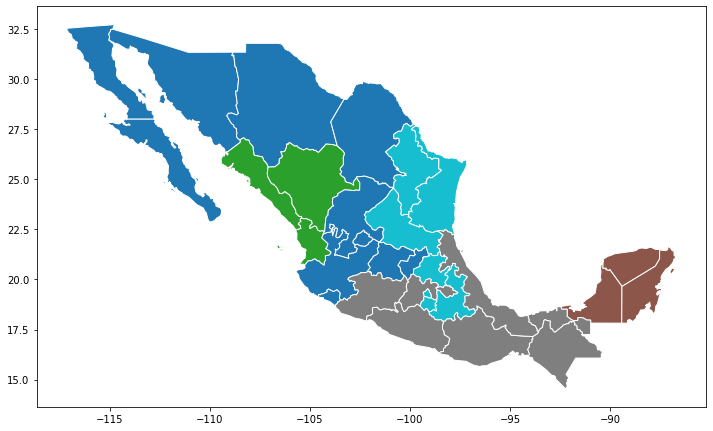

In [20]:
mexico['azp_new'] = model.labels_
mexico['number'] = 1
mexico[['azp_new','number']].groupby(by='azp_new').count()
mexico.plot(column='azp_new', categorical=True, edgecolor='w')